In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("TrainingData/neodata/fault_all_2000.csv")

df.pop("Tamb") # Remove Tamp, it causes a covariance matrix to become singular

target = df.pop('target')

In [35]:
# Normalization / conditioning

# Use a subset
# td = td[td['Tamb'] == 10][td['Tset'] == 7]

test_norm_fact = (df.sum()/len(df))
dfn = df / test_norm_fact
dfn -= dfn.mean()

In [36]:
dfn.mean()

Pdis        9.822543e-17
Psuc        2.828529e-16
T0          1.006507e-16
Tc         -3.801688e-16
Tdis       -3.283276e-16
Tret       -6.480150e-17
Tsuc        1.070172e-16
Tsh         5.132582e-16
Tsup       -6.366463e-17
CondFan     3.395447e-16
CprPower   -2.061521e-16
Density     2.346496e-16
Tset        4.577790e-17
dtype: float64

----
# Dimensionality reduction using PCA

<BarContainer object of 10 artists>

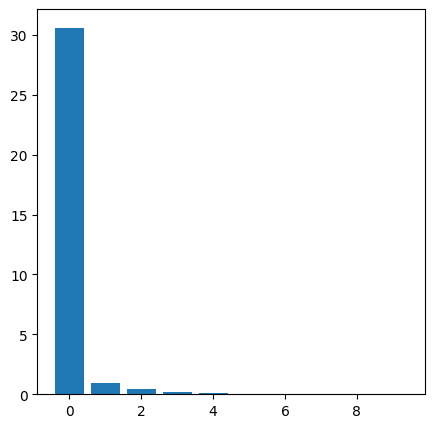

In [38]:
# Plot largest eigen values
eig_val , eig_vec = np.linalg.eig(dfn.cov())
plt.figure(figsize=(5,5))
plt.bar([x for x in range(10)],eig_val[0:10])

In [39]:
from pca import PCA_reducer as reducer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
pca = reducer(dfn,4)

dfn_red = pca.transform(dfn).assign(target=target)

Preserving 99.39% of eigen value transformations


In [41]:
dfn_red.sample(frac=1).head()

,0,1,2,3,target
22017,-0.949706,-1.028105,-0.753701,0.046676,0
267280,-0.867417,0.717953,-0.154282,-0.120330,7
744755,6.039372,-0.327960,0.611276,0.141311,20
663701,2.253427,-0.832209,-0.227670,0.154149,18
375976,2.307054,-0.835084,-0.193758,0.100543,10


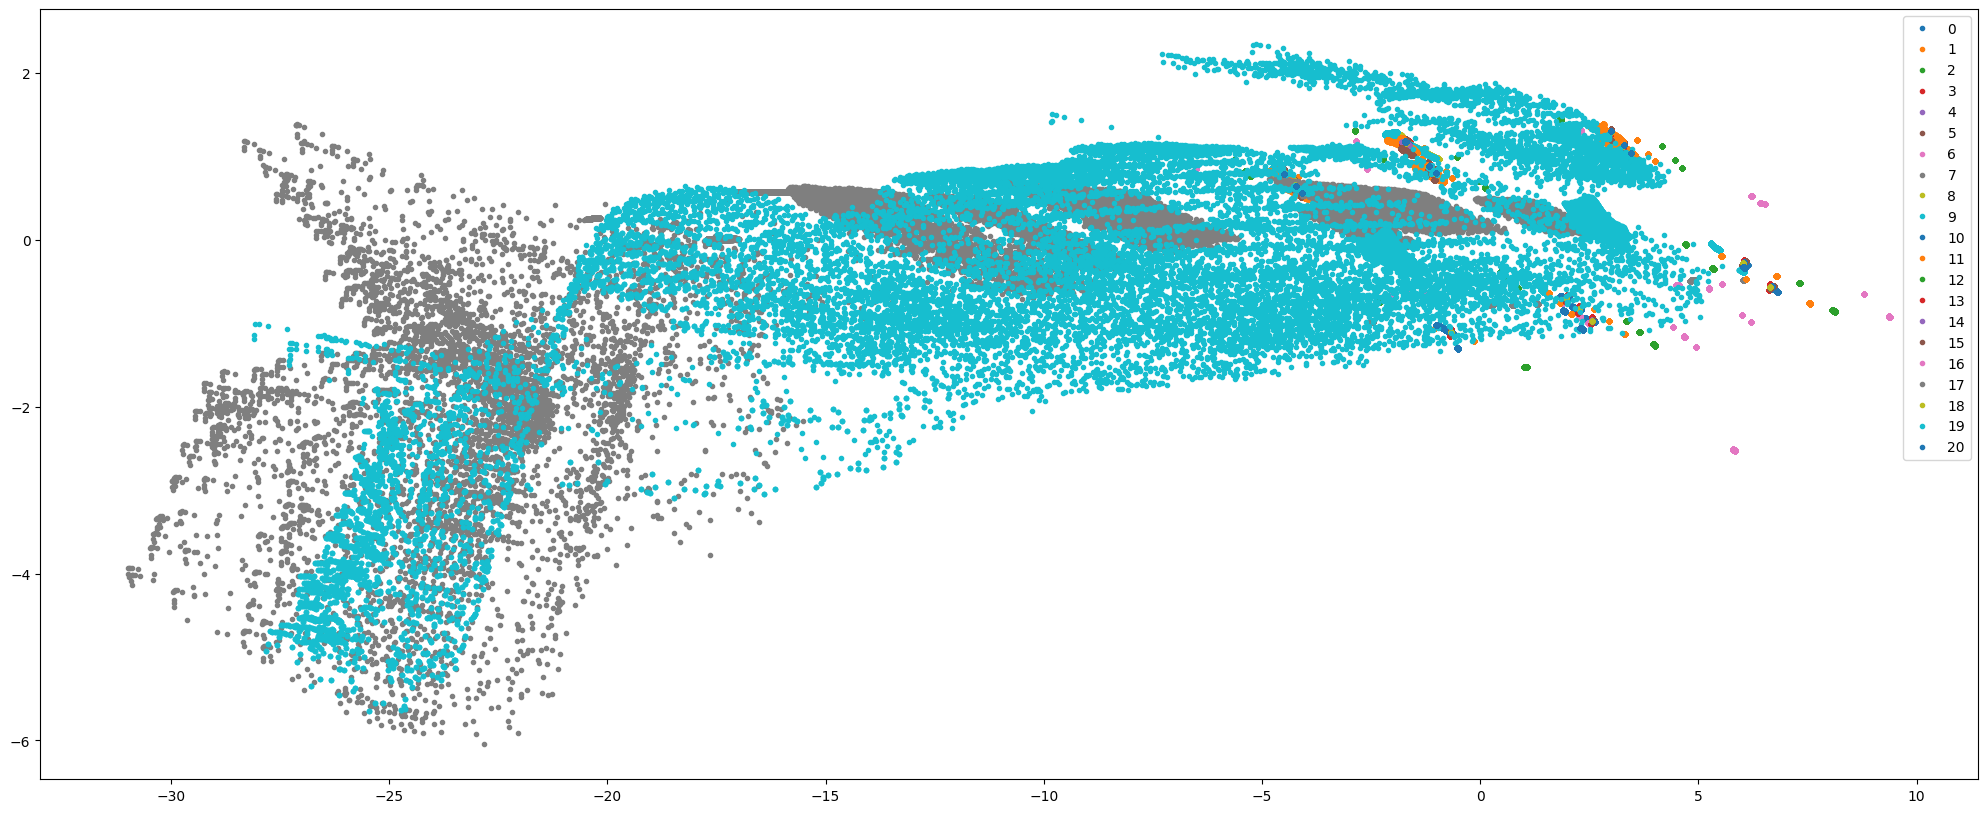

In [42]:
legends = []
plt.figure(figsize=(25,10))
for i in range(21):
    if i != 5 and i != 6 and i != 17 and i != 19 or True:
        plt.plot(dfn_red[dfn_red['target'] == i][0],dfn_red[dfn_red['target'] == i][1],'.')
        legends.append(i)
plt.legend(legends)

----
# Dimensionality reduction using LDA

In [43]:
x = dfn.assign(target=target)
x[x['target'] == 1].head()


,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tset,target
36000,-0.105346,-0.196769,-3.315191,-0.109385,-0.041226,-0.716317,-0.807467,-0.440062,-1.000004,-0.362618,-0.554163,-0.179837,-1.0,1
36001,-0.105346,-0.196769,-3.315192,-0.109385,-0.041226,-0.716318,-0.807467,-0.440062,-1.000004,-0.362618,-0.554163,-0.179837,-1.0,1
36002,-0.105346,-0.196769,-3.315192,-0.109385,-0.041226,-0.716318,-0.807467,-0.440062,-1.000004,-0.362618,-0.554163,-0.179837,-1.0,1
36003,-0.105346,-0.196769,-3.315192,-0.109385,-0.041226,-0.716318,-0.807467,-0.440062,-1.000004,-0.362618,-0.554163,-0.179837,-1.0,1
36004,-0.105346,-0.196769,-3.315192,-0.109385,-0.041226,-0.716318,-0.807467,-0.440062,-1.000004,-0.362618,-0.554163,-0.179837,-1.0,1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Processing 1 of 21 targets
Processing 2 of 21 targets
Processing 3 of 21 targets
Processing 4 of 21 targets
Processing 5 of 21 targets
Processing 6 of 21 targets
Processing 7 of 21 targets
Processing 8 of 21 targets
Processing 9 of 21 targets
Processing 10 of 21 targets
Processing 11 of 21 targets
Processing 12 of 21 targets
Processing 13 of 21 targets
Processing 14 of 21 targets
Processing 15 of 21 targets
Processing 16 of 21 targets
Processing 17 of 21 targets
Processing 18 of 21 targets
Processing 19 of 21 targets
Processing 20 of 21 targets
Processing 21 of 21 targets
Preserving 99.2% of eigen value transformations


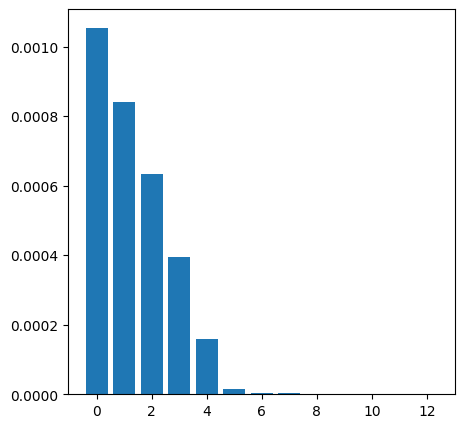

In [44]:
from lda import LDA_reducer as reducer
%load_ext autoreload
%autoreload 2

lda = reducer(dfn.assign(target=target),5,'target',0.25)

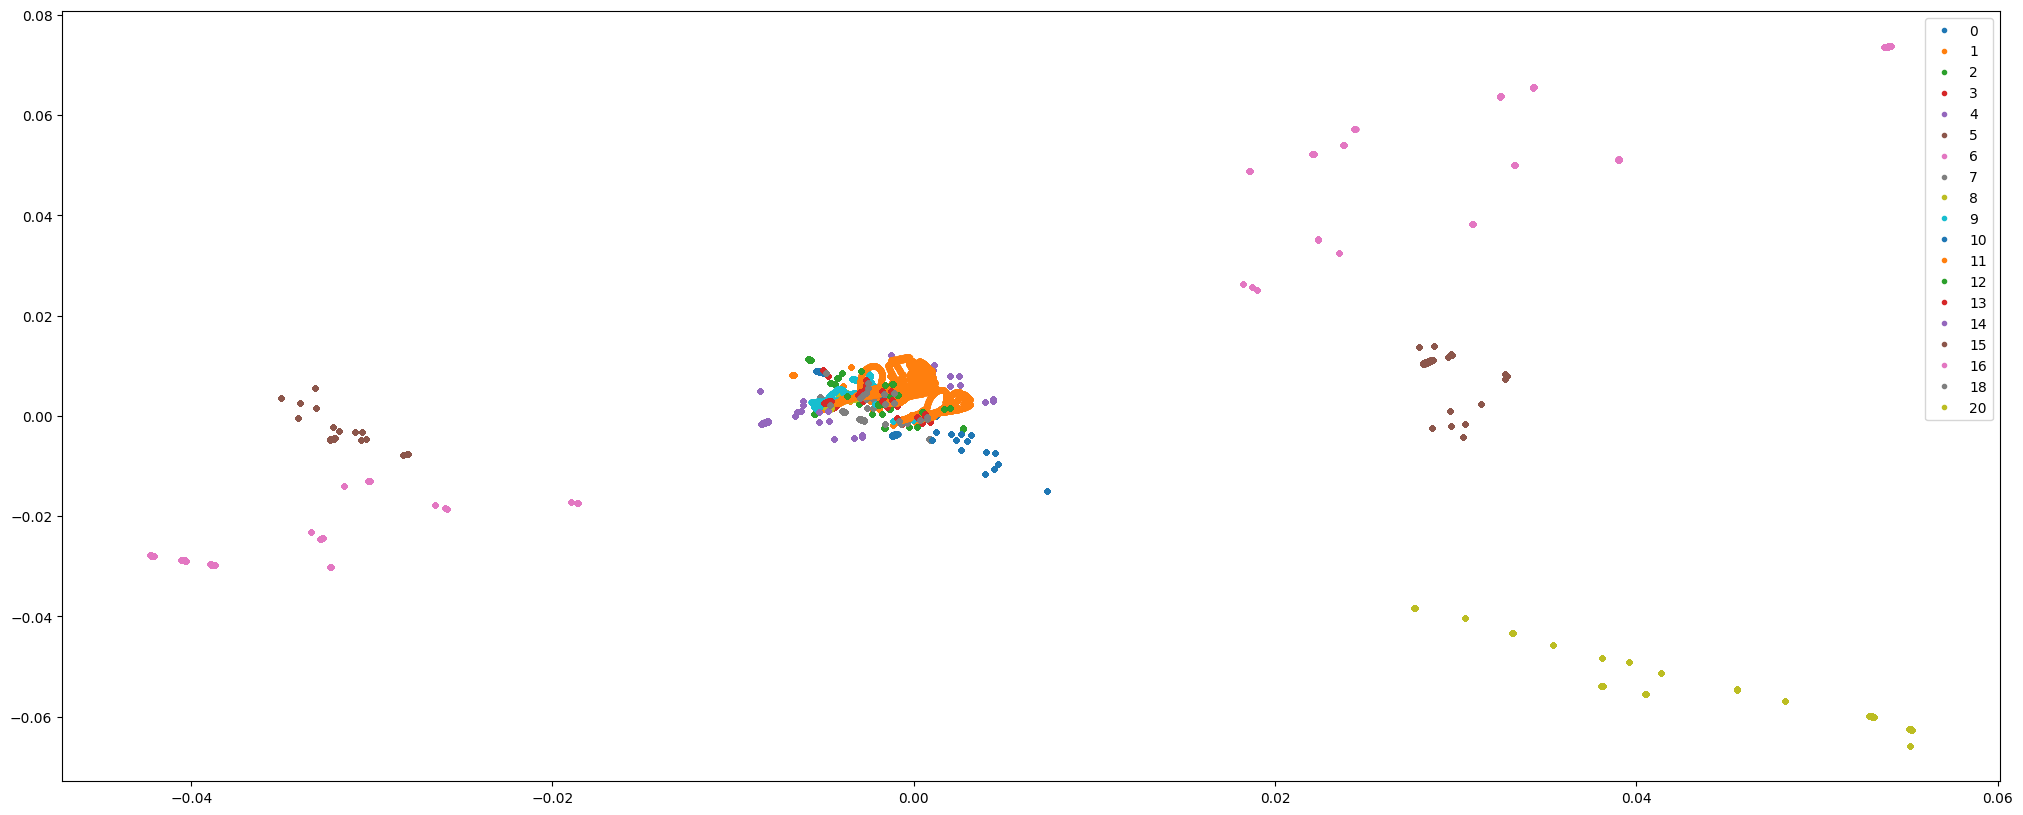

In [52]:
Z = lda.transform(dfn).assign(target=target)

legends = []
plt.figure(figsize=(25,10))
for i in range(0,21):
    if i != 17 and i != 19 or False:
        plt.plot(Z[Z['target'] == i][0],Z[Z['target'] == i][1],'.')
        legends.append(i)
plt.legend(legends)